In [1]:
import cv2
import numpy as np
import imutils
from matplotlib import pyplot as plt

# Weekly project part 1
Using the image "appletree.jpg"
1) Can you segment the apples from the tree?
2) Can you get the computer to count how many there are? 
    How close can you get to the ground truth? (there are 26 apples in the image)
3) Can you change the color of one of them?
4) Can you segment the leaves?


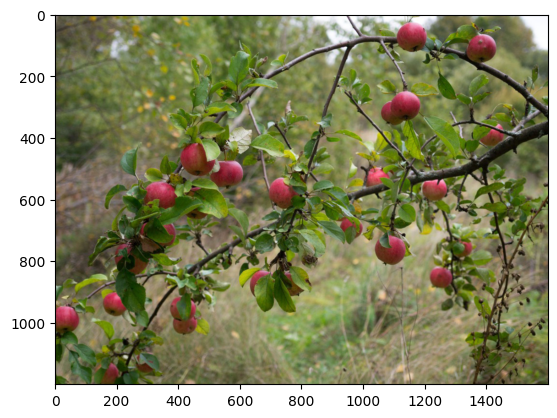

In [2]:
image = cv2.imread("appletree.jpg", )
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)

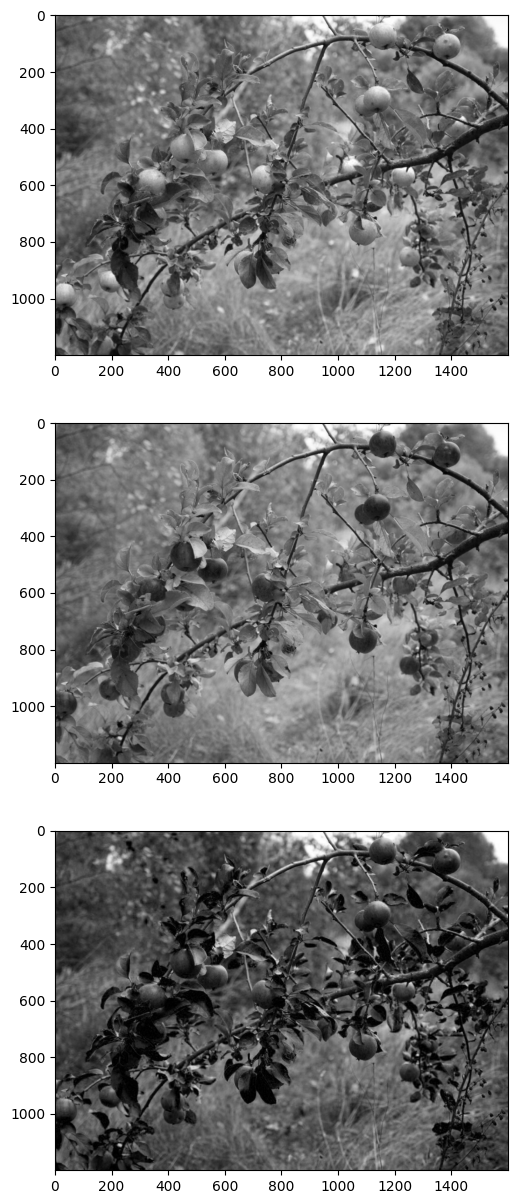

In [3]:
# Convert to HSV
r, g, b = cv2.split(image)

# Make a subplot of the three channels
fig, axs = plt.subplots(3, 1, figsize=(20, 15))
axs[0].imshow(r, cmap="gray")
axs[1].imshow(g, cmap="gray")
axs[2].imshow(b, cmap="gray")

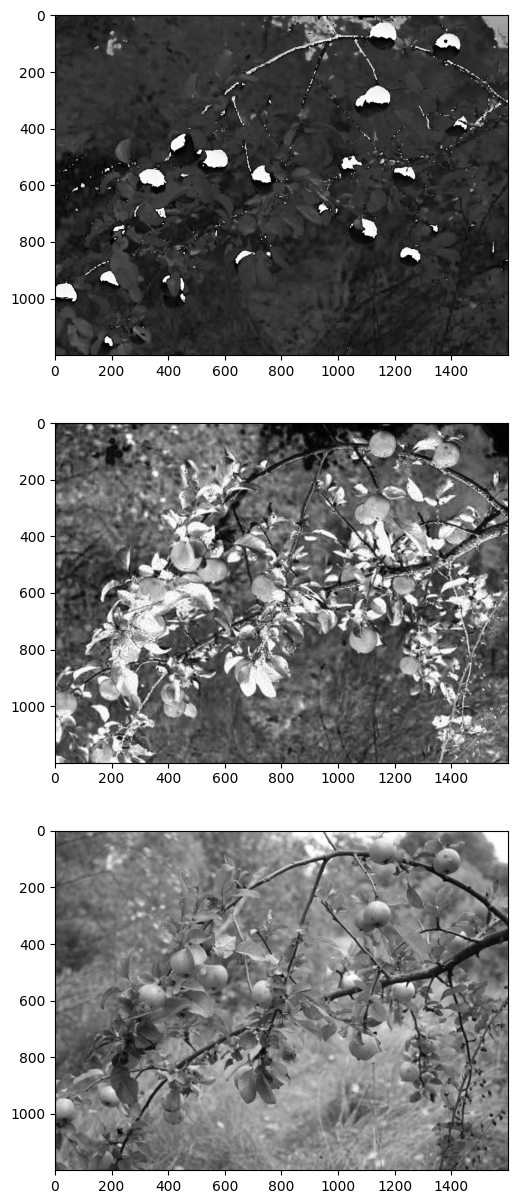

In [4]:
# Convert to HSV
hsv_img = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
h, s, v = cv2.split(hsv_img)

# Make a subplot of the three channels
fig, axs = plt.subplots(3, 1, figsize=(20, 15))
axs[0].imshow(h, cmap="gray")
axs[1].imshow(s, cmap="gray")
axs[2].imshow(v, cmap="gray")

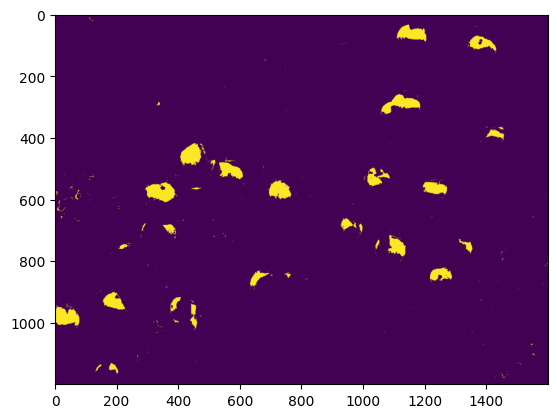

In [5]:
# Make a mask for the apples
mask_hsv = cv2.inRange(hsv_img, (80, 80, 100), (255, 255, 255))
mask_rgb = cv2.inRange(image, (120, 0, 0), (255, 100, 255))
plt.imshow(mask_rgb)

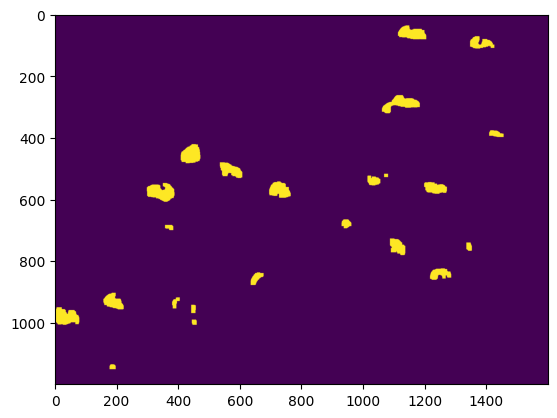

In [6]:
# Morphological operations
eroded = cv2.erode(mask_rgb, None, iterations=5)
dilated = cv2.dilate(eroded, None, iterations=5)
plt.imshow(dilated)

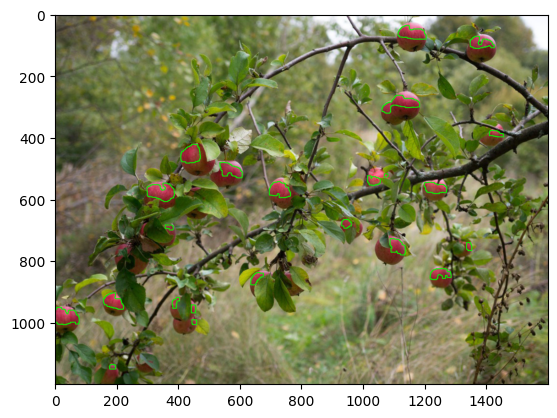

In [7]:
output = image.copy()
# Find contours
contours = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(contours)
# Draw contours
cv2.drawContours(output, contours, -1, (0, 255, 0), 2)
plt.imshow(output)

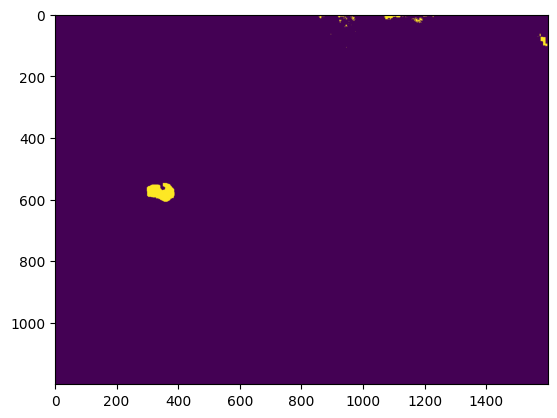

In [8]:
one_apple = image.copy()
cv2.drawContours(one_apple, [contours[12]], -1, (0,255,0), -1)
one_apple = one_apple[:,:,1] == 255
plt.imshow(one_apple)

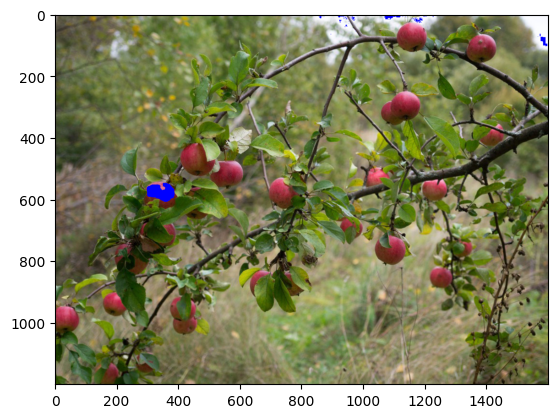

In [9]:
img_one_apple = image.copy()
img_one_apple[one_apple] = [0,0,255]
plt.imshow(img_one_apple)

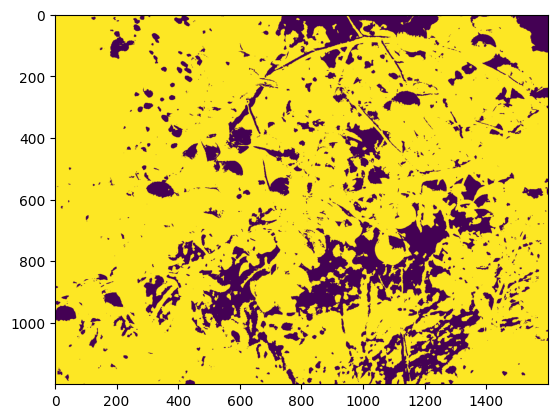

In [10]:
mask_rgb = cv2.inRange(image, (0, 0, 0), (150, 255, 150))
plt.imshow(mask_rgb)

# Weekly project part 2
1) Remove the greenscreen and replace the background in "itssp.png".
2) Can you improve the edge with eroding/dilating?

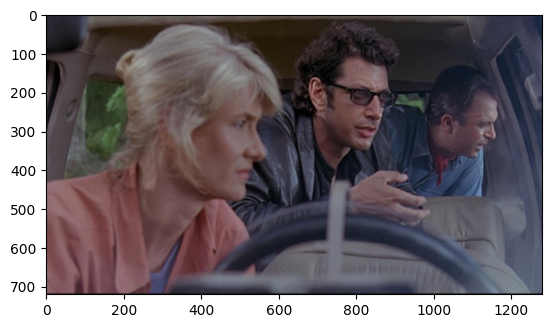

In [35]:
image = cv2.imread("ittsp.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
background = cv2.imread("jp.png")
background = cv2.cvtColor(background, cv2.COLOR_BGR2RGB)
background = cv2.resize(background, (image.shape[1], image.shape[0]))
plt.imshow(background)

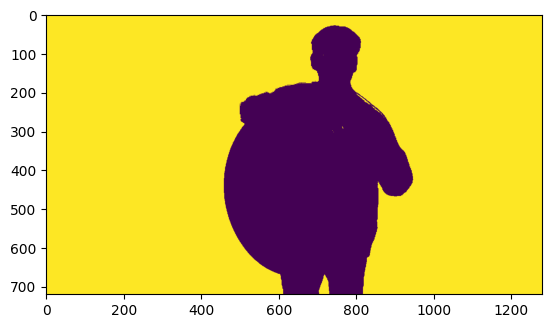

In [36]:
green_screen_mask = image[:,:,1] > 240
plt.imshow(green_screen_mask)

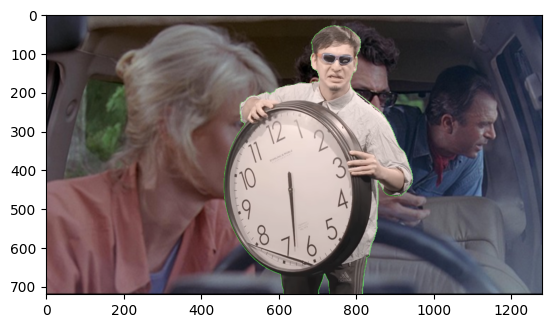

In [37]:
output = image.copy()
output[green_screen_mask] = background[green_screen_mask]
plt.imshow(output)